In [1]:
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import random
from SeismicDataset import SeismicDataset

### Initialize the Dataset

In [2]:
segy_dir = 'dummy_seismic_cubes/struc'

# Test different modes
dataset_traces = SeismicDataset(segy_dir, mode='traces')
print(f"Traces dataset length: {len(dataset_traces)}")
print ("============")

dataset_inline = SeismicDataset(segy_dir, mode='inline')
print(f"Inline dataset length: {len(dataset_inline)}")
print ("============")

dataset_xline = SeismicDataset(segy_dir, mode='xline')
print(f"Crossline dataset length: {len(dataset_xline)}")
print ("============")

dataset_time = SeismicDataset(segy_dir, mode='time')
print(f"Time dataset length: {len(dataset_time)}")
print ("============")

dataset_cube = SeismicDataset(segy_dir, mode='cube')
print(f"Cube dataset length: {len(dataset_cube)}")
print ("============")

Traces dataset length: 74
Inline dataset length: 14
Crossline dataset length: 13
Time dataset length: 110
Cube dataset length: 3


In [3]:
segy_dir_2 = 'dummy_seismic_cubes/unstruc'

# Test different modes
dataset_traces_unstruc = SeismicDataset(segy_dir_2, False, mode='traces')
print(f"Traces dataset length: {len(dataset_traces)}")
print ("============")

try :
    dataset_inline_unstruc = SeismicDataset(segy_dir_2, False, mode='inline')
    print(f"Inline dataset length: {len(dataset_inline)}")
    print ("============")
except: 
    print ("No inline data in unstructured mode")
    print ("============")

Traces dataset length: 74
No inline data in unstructured mode


### Visualize Data

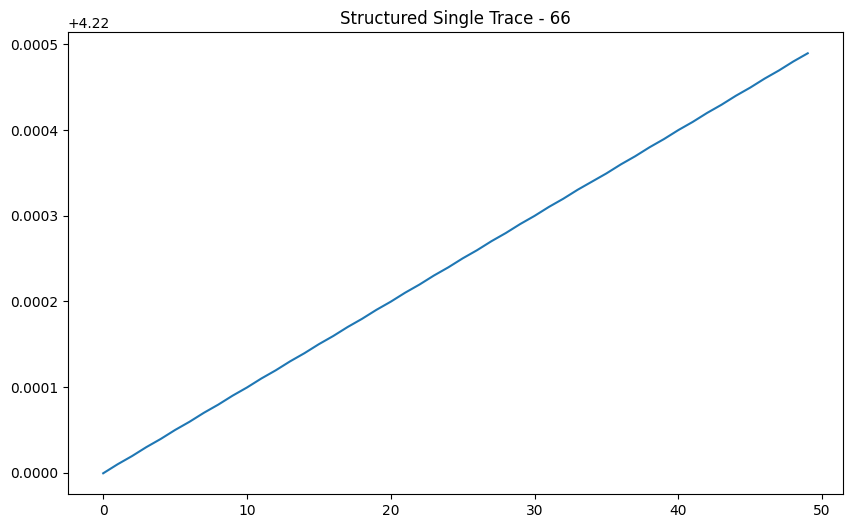

In [4]:
def plot_seismic_data(data, title):
    plt.figure(figsize=(10, 6))
    plt.imshow(data, cmap='seismic', aspect='auto')
    plt.colorbar()
    plt.title(title)
    plt.show()

idx = random.randint(0, len(dataset_traces)-1)
plt.figure(figsize=(10, 6))
plt.plot(dataset_traces[idx])
plt.title('Structured Single Trace - {}'.format(idx))
plt.show()

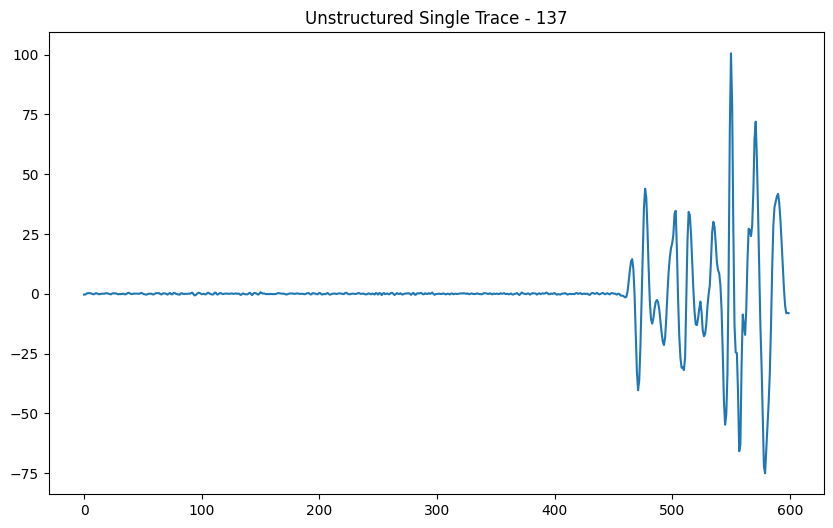

In [5]:
idx = random.randint(0, len(dataset_traces_unstruc)-1)
plt.figure(figsize=(10, 6))
plt.plot(dataset_traces_unstruc[idx])
plt.title('Unstructured Single Trace - {}'.format(idx))
plt.show()

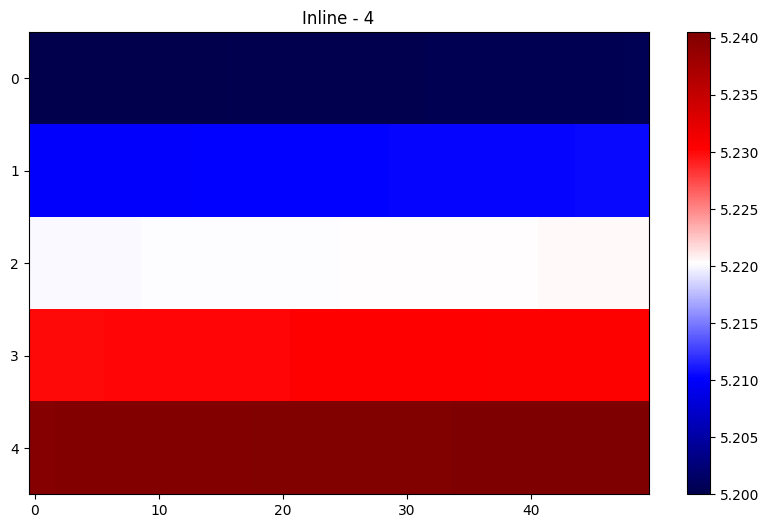

In [6]:
idx = random.randint(0, len(dataset_inline)-1)
plot_seismic_data(dataset_inline[idx], 'Inline - {}'.format(idx))

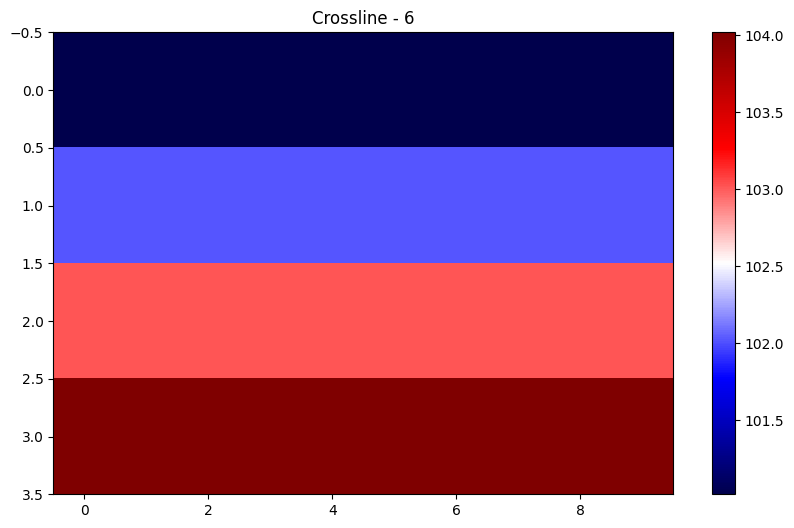

In [7]:
idx = random.randint(0, len(dataset_xline)-1)
plot_seismic_data(dataset_xline[idx], 'Crossline - {}'.format(idx))

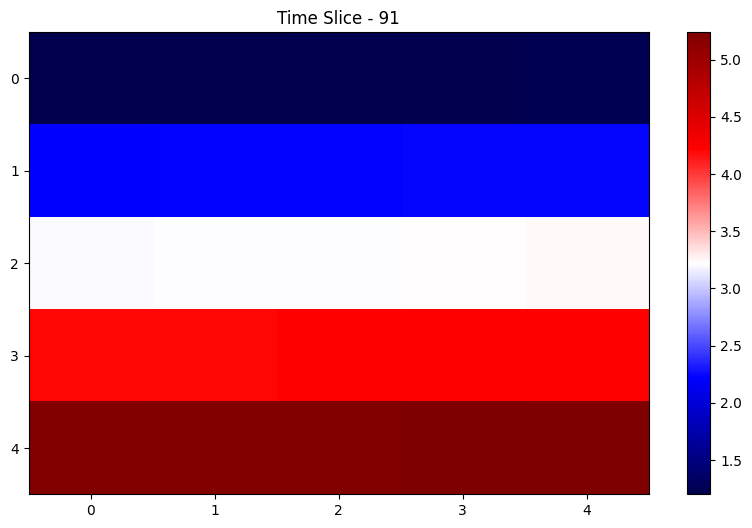

In [8]:
idx = random.randint(0, len(dataset_time)-1)
plot_seismic_data(dataset_time[idx], 'Time Slice - {}'.format(idx))

In [9]:
def plot_3d_seismic_data(data, title):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.voxels(data, edgecolor='k')
    plt.title(title)
    plt.show()

In [10]:
print(dataset_cube[1].shape)

(4, 3, 2, 10)


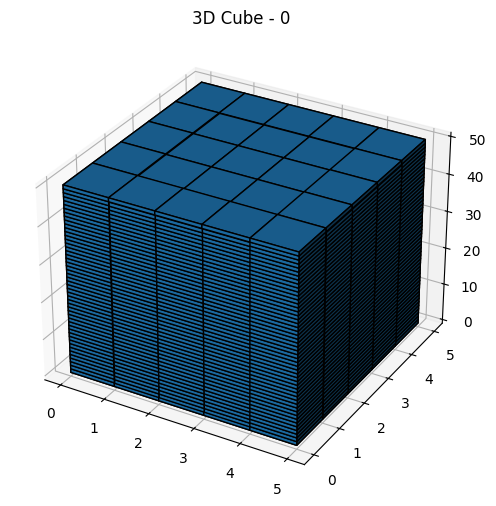

In [11]:
idx = random.randint(0, len(dataset_cube)-1)
plot_3d_seismic_data(dataset_cube[idx], '3D Cube - {}'.format(idx))

## Test with DataLoader

In [12]:
dataloader = DataLoader(dataset_traces, batch_size=8, shuffle=True, collate_fn=dataset_traces.padded_collate)

for i, batch in enumerate(dataloader):
    print(f"Batch {i+1} shape: {batch[0].shape}")
    # print (batch[0])
    if i == 2:  # Print first 3 batches
        break

Batch 1 shape: torch.Size([8, 50])
Batch 2 shape: torch.Size([8, 50])
Batch 3 shape: torch.Size([8, 50])


In [13]:
dataloader = DataLoader(dataset_inline, batch_size=8, shuffle=True, collate_fn=dataset_inline.padded_collate)

for i, batch in enumerate(dataloader):
    print(f"Batch {i+1} shape: {batch[0].shape}")
    # print (batch[0])
    if i == 2:  # Print first 5 batches
        break

Batch 1 shape: torch.Size([8, 5, 50])
Batch 2 shape: torch.Size([6, 5, 50])


In [14]:
dataloader = DataLoader(dataset_cube, batch_size=2, shuffle=True, collate_fn=dataset_cube.padded_collate)

for i, batch in enumerate(dataloader):
    print(f"Batch {i+1} shape: {batch[0].shape}")
    # # print (batch[0])
    # if i == 2:  # Print first 5 batches
    #     break

AssertionError: Mixed pre-stacked and post-stacked data

### Test Transforms

In [ ]:
def normalize(data):
    return (data - np.mean(data)) / np.std(data)


dataset_with_transform = SeismicDataset(segy_dir, mode='traces', transform=[normalize])
idx = random.randint(0, len(dataset_with_transform)-1)

original_trace = dataset_traces[idx]
transformed_trace = dataset_with_transform[idx]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(original_trace)
plt.title('Original Trace')
plt.subplot(1, 2, 2)
plt.plot(transformed_trace)
plt.title('Normalized Trace')
plt.show()

In [ ]:
unstruc_dataset = SeismicDataset(segy_dir_2, False, mode='traces')
unstruc_dataset_with_transform = SeismicDataset(segy_dir_2, False, mode='traces', transform=[normalize])

idx = random.randint(0, len(unstruc_dataset_with_transform)-1)

original_trace = unstruc_dataset[idx]
transformed_trace = unstruc_dataset_with_transform[idx]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(original_trace)
plt.title('Original Trace')
plt.subplot(1, 2, 2)
plt.plot(transformed_trace)
plt.title('Normalized Trace')
plt.show()

### Test Error Handling

In [ ]:
try:
    data = dataset_traces[len(dataset_traces)+5]
except IndexError as e:
    print(f"Caught expected error: {e}")

try:
    invalid_dataset = SeismicDataset(segy_dir, mode='huh?')
except ValueError as e:
    print(f"Caught expected error: {e}")

### Test save and load 

In [ ]:
path_traces = 'dummy_npy_cubes/traces'
path_cubes = 'dummy_npy_cubes/cubes'
path_inline = 'dummy_npy_cubes/inline'
path_xline = 'dummy_npy_cubes/xline'
path_time = 'dummy_npy_cubes/time'


In [ ]:
# save the dataset
dataset_traces.save_dataset(path_traces)
new_dataset_traces = SeismicDataset.from_path(path_traces)

idx = random.randint(0, len(new_dataset_traces)-1)
# plot the data from both sets side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(dataset_traces[idx])
plt.title('Original Trace')

plt.subplot(1, 2, 2)
plt.plot(new_dataset_traces[idx])
plt.title('Saved Trace')
plt.show()

assert np.array_equal(dataset_traces[idx], new_dataset_traces[idx])

In [ ]:
def plot_seismic_data_two(data1, data2, title):
    # plot the data from both sets side by side
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(data1, cmap='seismic', aspect='auto')
    plt.colorbar()
    plt.title('Original {}'.format(title))
    
    plt.subplot(1, 2, 2)
    plt.imshow(data2, cmap='seismic', aspect='auto')
    plt.colorbar()
    plt.title('Saved {}'.format(title))
    plt.show()


In [ ]:
    
dataset_inline.save_dataset(path_inline)
new_dataset_inline = SeismicDataset.from_path(path_inline)

idx = random.randint(0, len(new_dataset_inline)-1)
plot_seismic_data_two(dataset_inline[idx], new_dataset_inline[idx], 'Inline')
assert np.array_equal(dataset_inline[idx], new_dataset_inline[idx])

In [ ]:
dataset_xline.save_dataset(path_xline)
new_dataset_xline = SeismicDataset.from_path(path_xline)

idx = random.randint(0, len(new_dataset_xline)-1)
plot_seismic_data_two(dataset_xline[idx], new_dataset_xline[idx], 'Crossline')
assert np.array_equal(dataset_xline[idx], new_dataset_xline[idx])

In [ ]:
dataset_time.save_dataset(path_time)
new_dataset_time = SeismicDataset.from_path(path_time)

idx = random.randint(0, len(new_dataset_time)-1)
plot_seismic_data_two(dataset_time[idx], new_dataset_time[idx], 'Time Slice')
assert np.array_equal(dataset_time[idx], new_dataset_time[idx])

In [ ]:
path_unstruc_traces = 'dummy_npy_cubes/unstruc_traces'
path_unstruc_cubes = 'dummy_npy_cubes/unstruc_cubes'

In [ ]:
dataset_traces_unstruc.save_dataset(path_unstruc_traces)
new_dataset_traces_unstruc = SeismicDataset.from_path(path_unstruc_traces)

idx = random.randint(0, len(new_dataset_traces_unstruc)-1)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(dataset_traces_unstruc[idx])
plt.title('Original Trace')

plt.subplot(1, 2, 2)
plt.plot(new_dataset_traces_unstruc[idx])
plt.title('Saved Trace')
plt.show()

In [ ]:
dataset_cube.save_dataset(path_cubes)
new_dataset_cube = SeismicDataset.from_path(path_cubes)

idx = random.randint(0, len(new_dataset_cube)-1)
plot_3d_seismic_data(dataset_cube[idx], 'Original 3D Cube')
plot_3d_seismic_data(new_dataset_cube[idx], 'Saved 3D Cube')
assert np.array_equal(dataset_cube[idx], new_dataset_cube[idx])